Detect, flag, and remove images that meet flagging criterion

In [52]:
import rasterio
from rasterio.windows import Window
from pyproj import Transformer
import numpy as np
import os
from os import listdir
from os.path import isfile, join
np.random.seed(420)
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math
import pyproj
import geojson
import cv2
from PIL import Image, ImageEnhance

In [53]:
df = pd.read_csv('CEEG.csv')

In [54]:

directory = 'all_data'
non_imgs, non_lbls = [], []
processed_dates = {'CIcyano': set(), 'truecolor': set()}

for folder in sorted(os.listdir(directory)):
    if folder not in [".DS_Store", ".ipynb_checkpoints"]:
        for file in sorted(os.listdir(os.path.join(directory, folder))):
            if file.endswith('.tif'):
                year = folder.split('_')[1]
                date = file.split('.')[2][:2] + '/' + file.split('.')[2][2:] + '/' + year[2:]
                filetype = file.split('.')[-3]

                if date in df['DateCollected'].values and date not in processed_dates[filetype]:
                    working_path = os.path.join(folder, file)
                    
                    if filetype == "CIcyano":
                        non_lbls.append(working_path)
                    elif filetype == "truecolor":
                        non_imgs.append(working_path)
                    
                    # Mark this date as processed for the specific file type
                    processed_dates[filetype].add(date)

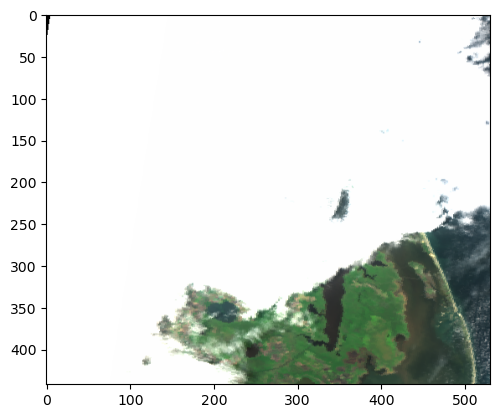

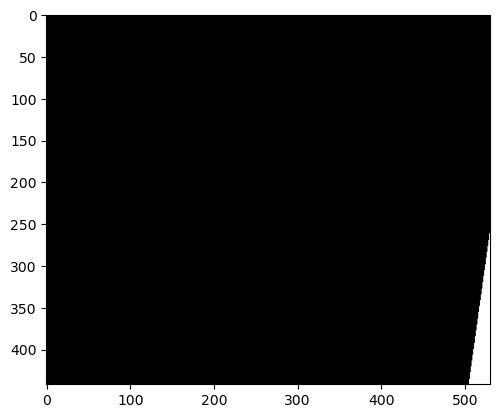

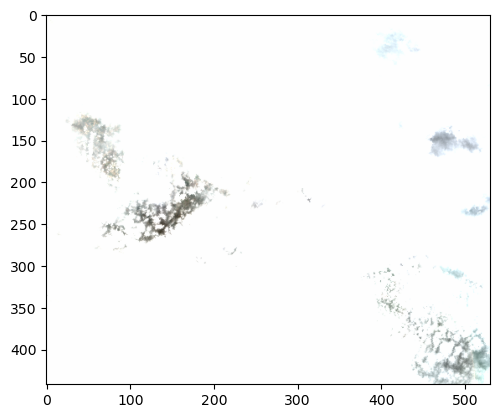

In [30]:
lat, lon = 35.61111, -76.290862
y = 182
x = 0 
removes = []
otherdir = 'others'
for i in non_imgs[:6]:
    filename = i.split('/')[-1]
    imgtype = i.split('.')[-3]
    
    with rasterio.open(os.path.join(directory, i)) as rds:
        transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
        xx, yy = transformer.transform(lon, lat)
        row, col = rds.index(xx, yy)
        
        if row > y and col > x:
            try:
                window = Window.from_slices(rows = (0, col+y), cols =(0,rds.width))
                data = rds.read(window=window)
                data = np.moveaxis(data, 0, 2) 
                img_arr = np.array(data)
                avg = np.mean(img_arr/255)
                std = np.std(img_arr)
                
                black_pixels_mask = np.sum(np.all(img_arr == [0, 0, 0], axis=-1))
                white_pixels_mask = np.sum(np.all(img_arr == [255, 255, 255], axis=-1))
                
                if std <= 26 or std >= 100 and avg <= 0.1 or avg >= 0.9 or black_pixels_mask > 100000 or white_pixels_mask > 45000:
                    plt.imshow(img_arr)
                    plt.show()
#                     print(std, avg, black_pixels_mask,white_pixels_mask)
#                     print('file added for removal')
#                     removes.append(i)
#                 else:
                    
                    

#                 output_filename = os.path.join(otherdir, filename.replace('.tif', '.jpg'))
#                 im = Image.fromarray(data)
#                 im.save(output_filename)

                
            except Exception as e:
                print(e)
                pass

In [30]:
removes

['albemarle_2016_archive/sentinel-3.2016202.0720.1443C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2016_archive/sentinel-3.2016335.1130.1534C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2017_archive/sentinel-3.2017017.0117.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2017_archive/sentinel-3.2017173.0622.1546C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2017_archive/sentinel-3.2017289.1016.1538C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2018_archive/sentinel-3.2018051.0220.1546C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2018_archive/sentinel-3.2018178.0627.1553C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2018_archive/sentinel-3.2018200.0719.1442C.b.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2018_archive/sentinel-3.2018240.0828.1545C.b.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
 'albemarle_2019_archive/sentinel-3.2019074.03

In [7]:
len(removes)

41

In [8]:
trash = set(removes)
imgs = set(non_imgs)
updated_imgs = set(imgs-trash)

In [15]:
non_lbls = set(non_lbls)

In [16]:
markers_to_match = set()
for i in removes:
    markers_to_match.add(i.split('.')[1])

In [17]:
i=0
lblremove = set()
for file in non_lbls:
    marker = file.split('.')[1]
#     print(marker)
    if marker in markers_to_match:
        print(f'match at {marker}')
        i+=1
        lblremove.add(file)
        
# len(non_lbls)
#         file_path = os.path.join('emptylabels', file)
#         try:
#             os.remove(file_path)
#             print(f"Deleted: {file}")
#         except Exception as e:
#             print(f"Failed to delete {file}: {e}")

match at 2022174
match at 2020254
match at 2016202
match at 2021259
match at 2021319
match at 2019163
match at 2017289
match at 2023187
match at 2020268
match at 2018200
match at 2023341
match at 2018051
match at 2021021
match at 2022193
match at 2020226
match at 2022016
match at 2022166
match at 2018178
match at 2022081
match at 2021180
match at 2016140
match at 2023005
match at 2022216
match at 2022031
match at 2021341
match at 2019074
match at 2019281
match at 2017173
match at 2017017
match at 2021238
match at 2019115
match at 2019169
match at 2020286
match at 2020055
match at 2021105
match at 2022235
match at 2019178
match at 2018240
match at 2021042
match at 2016335
match at 2018219


In [18]:
updatedlbls = set(non_lbls-lblremove)
print(len(updated_imgs),len(updatedlbls))

98 98


In [19]:
markers_to_match = set()
for i in updated_imgs:
    markers_to_match.add(i.split('.')[1])
    
# markers_to_match = set()
# for i in non_imgs:
#     markers_to_match.add(i.split('.')[1])

In [20]:
lblset = set()
for i in updatedlbls:
    mark = i.split('.')[1]
    lblset.add(mark)

In [21]:
markers_to_match - lblset

set()

In [22]:
os.mkdir('emptyimgs')
os.mkdir('emptylbls')

In [25]:
lat, lon = 35.8212205, -76.290862
y = 145
x = 0 
emptyimgdir = 'emptyimgs'
emptylbldir = 'emptylbls'
for i in updated_imgs:
    filename = i.split('/')[-1]
    imgtype = i.split('.')[-3]

    with rasterio.open(os.path.join(directory, i)) as rds:
        transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
        xx, yy = transformer.transform(lon, lat)
        row, col = rds.index(xx, yy)
        
        if row > y and col > x:
            try:
                window = Window.from_slices(rows = (0, col+y), cols =(0,rds.width))
                data = rds.read(window=window)
                data = np.moveaxis(data, 0, 2) 
                img_arr = np.array(data)
#                 avg = np.mean(img_arr/255)
#                 std = np.std(img_arr)
                
#                 black_pixels_mask = np.sum(np.all(img_arr == [0, 0, 0], axis=-1))
# #              
#                 if std <= 26 or std >= 100 and avg <= 0.1 or avg >= 0.9 or black_pixels_mask >100000:
#                 plt.imshow(img_arr)
#                 plt.show()
#                     print(np.std(img_arr), np.mean(img_arr / 255), black_pixels_mask)
#                     print('file added for removal')
#                     removes.append(i)
#                 else:
                    

                output_filename = os.path.join(emptyimgdir, filename.replace('.tif', '.jpg'))
                im = Image.fromarray(data)
                im.save(output_filename)
                print('img saved')

                
            except Exception as e:
                print(e)
                pass

img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved


In [26]:
len (listdir('emptyimgs'))

98

In [27]:
lat, lon = 35.8212205, -76.290862
y = 145
x = 0 
emptyimgdir = 'emptyimgs'
emptylbldir = 'emptylbls'
for i in updatedlbls:
    filename = i.split('/')[-1]
    imgtype = i.split('.')[-3]

    with rasterio.open(os.path.join(directory, i)) as rds:
        transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
        xx, yy = transformer.transform(lon, lat)
        row, col = rds.index(xx, yy)
        
        if row > y and col > x:
            try:
                window = Window.from_slices(rows = (0, col+y), cols =(0,rds.width))
                data = rds.read(window=window)
                data = np.moveaxis(data, 0, 2) 
                img_arr = np.array(data)
#                 avg = np.mean(img_arr/255)
#                 std = np.std(img_arr)
                
#                 black_pixels_mask = np.sum(np.all(img_arr == [0, 0, 0], axis=-1))
# #              
#                 if std <= 26 or std >= 100 and avg <= 0.1 or avg >= 0.9 or black_pixels_mask >100000:
#                 plt.imshow(img_arr)
#                 plt.show()
#                     print(np.std(img_arr), np.mean(img_arr / 255), black_pixels_mask)
#                     print('file added for removal')
#                     removes.append(i)
#                 else:
                    

 
                print('img saved')

                
            except Exception as e:
                print(e)
                pass

img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved


In [28]:
len(listdir(emptylbldir))

98

In [45]:
os.mkdir('temp')

In [97]:
directory = 'all_data'
lat, lon = 35.61111, -76.290862
y = 182
x = 0 
i =0 
updated_dir = 'temp'
total_imgs = set()
goods = set()
removes, reviews = set(),set()
for folder in sorted(os.listdir(directory)):
    if folder not in [".DS_Store", ".ipynb_checkpoints"]:
        for file in sorted(os.listdir(os.path.join(directory, folder))):
            folder_path = os.path.join(directory, folder)
            if file.endswith('.tif') and file.split('.')[-3] == 'truecolor':
                working_path = os.path.join(folder_path, file)

                total_imgs.add(working_path)
                with rasterio.open(working_path) as rds:
                    transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
                    xx, yy = transformer.transform(lon, lat)
                    row, col = rds.index(xx, yy)

                    if row > y and col > x:
                        try:
                            window = Window.from_slices(rows = (0, col+y), cols =(0,rds.width))
                            data = rds.read(window=window)
                            data = np.moveaxis(data, 0, 2) 
                            img_arr = np.array(data)
                            
                            #removal metrics
                            avg = np.mean(img_arr/255)
                            std = np.std(img_arr)
                            black_pixels_mask = np.sum(np.all(img_arr == [0, 0, 0], axis=-1))
                            white_pixels_mask = np.sum(np.all(img_arr == [255, 255, 255], axis=-1))
#                             print(std, avg, black_pixels_mask,white_pixels_mask)
#                             print(file)
                            if std <= 26 or std >= 100 and avg <= 0.1 or avg >= 0.9 or black_pixels_mask >= 100000 or white_pixels_mask >= 48000:
                                
                                print('file flagged for removal')
                                removes.add(working_path)
#                                 plt.imshow(img_arr)
#                                 plt.show()
            
                                if 48000 < white_pixels_mask < 50000:
                                    reviews.add(working_path)
                                    i+=1
                            else:
                                goods.add(working_path)
#                                 output_filename = os.path.join(updated_dir, file.replace('.tif', '.jpg'))
#                                 im = Image.fromarray(data)
#                                 im.save(output_filename)


                        except Exception as e:
                            print(e)
                            pass
            

file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal


file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal


file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal


file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal


file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal
file flagged for removal


In [83]:
print(len(goods))
print(len(total_imgs))
print(len(removes))

1987
3461
1474


In [98]:
keeps =['all_data/albemarle_2016_archive/sentinel-3.2016194.0712.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2017_archive/sentinel-3.2017044.0213.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2017_archive/sentinel-3.2017098.0408.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2017_archive/sentinel-3.2017152.0601.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2017_archive/sentinel-3.2017179.0628.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2017_archive/sentinel-3.2017233.0821.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2018_archive/sentinel-3.2018111.0421.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2018_archive/sentinel-3.2018192.0711.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2018_archive/sentinel-3.2018219.0807.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2018_archive/sentinel-3.2018219.0807.1450C.b.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2019_archive/sentinel-3.2019016.0116.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2019_archive/sentinel-3.2019097.0407.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2019_archive/sentinel-3.2019259.0916.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2019_archive/sentinel-3.2019286.1013.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2020_archive/sentinel-3.2020110.0419.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2020_archive/sentinel-3.2020137.0516.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2020_archive/sentinel-3.2020272.0928.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2020_archive/sentinel-3.2020326.1121.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2021_archive/sentinel-3.2021068.0309.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2021_archive/sentinel-3.2021176.0625.1450C.a.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif',
'all_data/albemarle_2022_archive/sentinel-3.2022216.0804.1450_1551C.ab.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif']
keeps= set(keeps)

In [91]:
keeps.issubset(goods)

False

In [86]:
updated_removes = removes - keeps

In [75]:
updated_removes.issubset(goods)

False

In [101]:
goods.update(keeps)

In [102]:
len(goods)

2008

In [30]:
removes = set(removes)
keeps = set(keeps)
updated_removes = removes - keeps
updated_removes = set(updated_removes)

In [110]:
os.mkdir('downloads')

In [114]:
len(goods)

2008

In [115]:
downloads = 'downloads'
for file in goods:
     with rasterio.open(file) as rds:
            filename = file.split('/')[-1]
            transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
            xx, yy = transformer.transform(lon, lat)
            row, col = rds.index(xx, yy)

            if row > y and col > x:
                try:
                    window = Window.from_slices(rows = (0, col+y), cols =(0,rds.width))
                    data = rds.read(window=window)
                    data = np.moveaxis(data, 0, 2) 
                    img_arr = np.array(data)

                    #removal metrics
                    avg = np.mean(img_arr/255)
                    std = np.std(img_arr)
                    black_pixels_mask = np.sum(np.all(img_arr == [0, 0, 0], axis=-1))
                    white_pixels_mask = np.sum(np.all(img_arr == [255, 255, 255], axis=-1))

#                     plt.imshow(img_arr)
#                     plt.axis('off')
#                     plt.title(f'{std}, {avg}, {black_pixels_mask}, {white_pixels_mask}')
#                     plt.show()
                    
                    output_filename = os.path.join(downloads, filename.replace('.tif', '.jpg'))
#                     print(output_filename)
                    im = Image.fromarray(data)
                    im.save(output_filename)


                except Exception as e:
                    print(e)
                    pass

In [2]:
len(listdir('downloads'))

2008

In [9]:
len(listdir('lbls'))

2008

442 530
(442, 530)


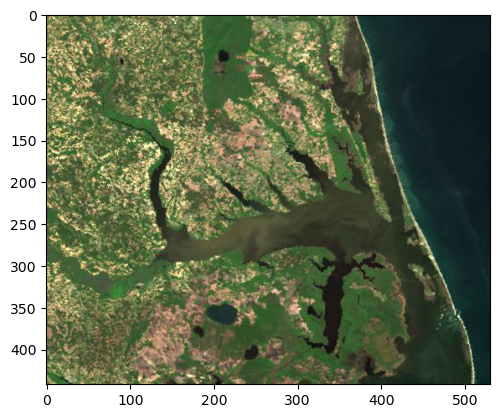

In [65]:
for file in sorted(listdir('downloads')):
    with rasterio.open(os.path.join('downloads', file)) as rds:
        data = rds.read()
        data = np.moveaxis(data, 0, 2) 

        imgdata = np.array(data)
        
        height, width = imgdata.shape[:2]
        print(height,width)
        imgdata = imgdata[:, :, :]  
        print(imgdata.shape[:2])
        plt.imshow(imgdata)
        break